# Step 1: Load and Prepare the Dataset

## Load DataSet

In [39]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Heart_Disease_Prediction.csv")
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## Binarization of the target column 

In [41]:
#Binarization

df["Heart Disease"] = df["Heart Disease"].map({
    "Presence": 1,
    "Absence": 0
})
print (df.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3         3              1  
1                        0         7              0  
2                        0

## EDA

In [ ]:
#Summary

print(df.describe())


              Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min 

In [48]:
#Missing values

print("Missing values:\n", df.isnull().sum())

Missing values:
 Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [50]:
#Data Types

print("\nData types:")
print(df.dtypes)


Data types:
Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease                int64
dtype: object


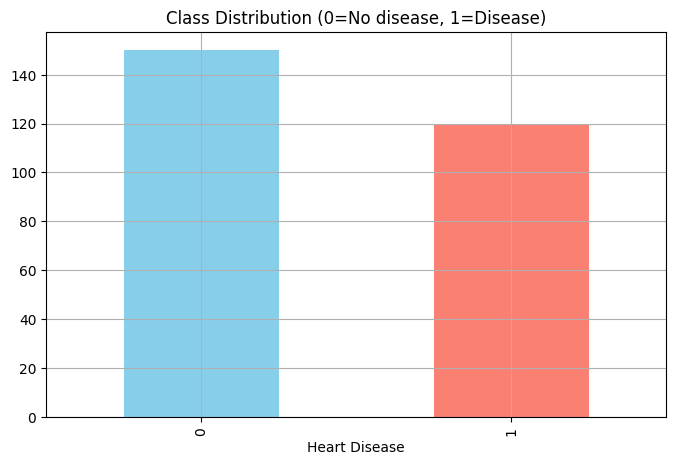

In [51]:
#Class Distribution

df['Heart Disease'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Class Distribution (0=No disease, 1=Disease)")
plt.show()

## PREP

In [ ]:
#Verification of columns names

print(df.columns)

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='str')


In [55]:
#Features

features = ['Age','Cholesterol','ST depression','Max HR','Exercise angina','BP']
X = df[features].values
y = df['Heart Disease'].values


In [56]:
#Normalization

X = (X - X.mean(axis=0)) / X.std(axis=0)

In [57]:
#Stratified_split

def stratified_split(X, y, test_size=0.3, seed=42):
    np.random.seed(seed)
    idx0 = np.where(y == 0)[0]   
    idx1 = np.where(y == 1)[0]   
    
    n0_test = int(len(idx0) * test_size)
    n1_test = int(len(idx1) * test_size)
    
    test_idx = np.concatenate([
        np.random.choice(idx0, n0_test, replace=False),
        np.random.choice(idx1, n1_test, replace=False)
    ])
    
    train_idx = np.array([i for i in range(len(y)) if i not in test_idx])
    
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = stratified_split(X, y)

In [58]:
#Verification

print("Train size:", len(y_train))
print("Test size:", len(y_test))
print("Train disease rate:", y_train.mean()*100)
print("Test disease rate:", y_test.mean()*100)


Train size: 189
Test size: 81
Train disease rate: 44.44444444444444
Test disease rate: 44.44444444444444


# Step 2: Implement Basic Logistic Regression

In [ ]:
#Sigmoid function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
#Binary cross-entropy cost

def compute_cost(X, y, w, b):
    m = len(y)
    z = X @ w + b
    h = sigmoid(z)
    return (-1/m) * np.sum(y*np.log(h+1e-9) + (1-y)*np.log(1-h+1e-9))


In [77]:
#Gradient

def compute_gradients(X, y, w, b):
    m = X.shape[0]
    z = X @ w + b
    y_hat = sigmoid(z)

    dw = (1/m) * (X.T @ (y_hat - y))
    db = (1/m) * np.sum(y_hat - y)

    return dw, db


In [82]:
#Gradient Descent optimization

def gradient_descent(X, y, alpha=0.01, iterations=2000):
    n = X.shape[1]
    w = np.zeros((n, 1))
    b = 0
    costs = []

    for i in range(iterations):
        dw, db = compute_gradients(X, y, w, b)
        w -= alpha * dw
        b -= alpha * db

        if i % 50 == 0:
            costs.append(compute_cost(X, y, w, b))

    return w, b, costs

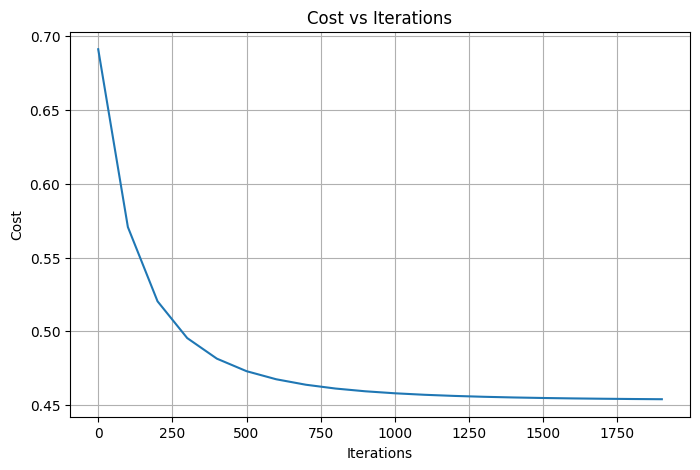

In [90]:
#Plot Cost vs iterations

plt.plot(range(0,2000,100), costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()


## Model Evaluation

In [87]:
def predict(X, w, b, threshold=0.5):
    return (sigmoid(X.dot(w) + b) >= threshold).astype(int)


In [ ]:
def metrics(y_true, y_pred):

    tp = np.sum((y_true==1) & (y_pred==1))
    tn = np.sum((y_true==0) & (y_pred==0))
    fp = np.sum((y_true==0) & (y_pred==1))
    fn = np.sum((y_true==1) & (y_pred==0))

    accurrancy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp+1e-9)
    recall = tp/(tp+fn+1e-9)
    f1 = 2*precision*recall/(precision+recall+1e-9)

    return accurrancy, precision, recall, f1

In [92]:
for name, Xs, ys in [('Train', X_train, y_train), ('Test', X_test, y_test)]:
    yp = predict(Xs, w, b)
    print(name, metrics(ys, yp))

Train (np.float64(0.7936507936507936), np.float64(0.7848101265723442), np.float64(0.7380952380864512), np.float64(0.7607361958101546))
Test (np.float64(0.7160493827160493), np.float64(0.7096774193319458), np.float64(0.6111111110941359), np.float64(0.6567164173936288))


# Step 3: Visualize Decision Boundaries